In [16]:
print("NAME: THARUN V K")
print("REG NO : 212223230231")

NAME: THARUN V K
REG NO : 212223230231


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
# Data preprocessing
data = data.drop(['CarName', 'car_ID'], axis=1)
data = pd.get_dummies(data, drop_first=True)

In [4]:
# Splitting the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [5]:
# Standardizing the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [6]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Define the models and pipelines
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5)
}

In [8]:
# Dictionary to store results
results = {}

In [9]:
# Train and evaluate each model
for name, model in models.items():
    # Create a pipeline with polynomial features and the model
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('regressor', model)
    ])
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    predictions = pipeline.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store results
    results[name] = {'MSE': mse, 'R² score': r2}

In [10]:
# Print results
for model_name, metrics in results.items():
    print(f"{model_name} - Mean Squared Error: {metrics['MSE']:.2f}, R² score: {metrics['R² score']:.2f}")


Ridge - Mean Squared Error: 0.23, R² score: 0.81
Lasso - Mean Squared Error: 1.05, R² score: 0.15
ElasticNet - Mean Squared Error: 0.65, R² score: 0.47


In [11]:
# Visualization of the results
# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

In [12]:
# Set the figure size
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

([0, 1, 2],
 [Text(0, 0, 'Ridge'), Text(1, 0, 'Lasso'), Text(2, 0, 'ElasticNet')])

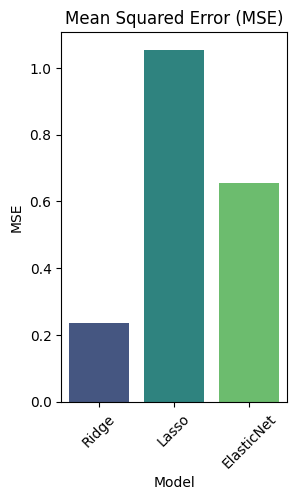

In [13]:
# Bar plot for MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', hue='Model', data=results_df, palette='viridis', legend=False)
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Ridge'), Text(1, 0, 'Lasso'), Text(2, 0, 'ElasticNet')])

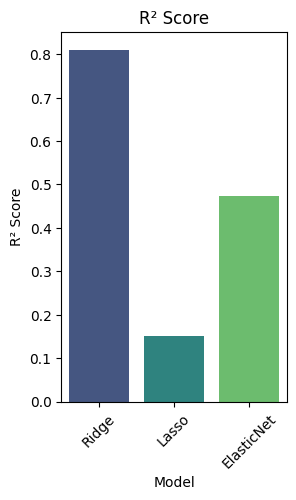

In [14]:
# Bar plot for R² score
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R² score', hue='Model', data=results_df, palette='viridis', legend=False)
plt.title('R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=45)

In [18]:
# Show the plots
plt.tight_layout()
plt.show()


print("NAME: THARUN V K")
print("REG NO : 212223230231")

<Figure size 640x480 with 0 Axes>

NAME: THARUN V K
REG NO : 212223230231
